# Extract negtive data in balance way

Extract negative data from neg_all-plus.csv

The number of positive and negative are *queal*.

neg_all-plus has been processed by:

1. remove no year data
2. fix data year in [1985, 2020]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm.notebook import tqdm

np.random.seed(0)
random.seed(0)

plt.rcParams["figure.figsize"] = [12, 8]

In [2]:
def year_distri(year_list: list) -> dict:
    """
    Count year districution.

    Input:
        year_list(list)

    Output:
        year_count(dict): key:years, value:count
        years_X(list): Years
        years_y(list): count
    """

    year_count = {}
    for i in year_list:
        year_count[i] = year_count.get(i, 0) + 1

    years_X = []  # keep order
    years_y = []

    for year, count in year_count.items():
        years_X.append(int(year))
    years_X.sort()

    for year in years_X:
        years_y.append(year_count[str(year)])

    return years_X, years_y, year_count

## Load data

In [3]:
neg_df = pd.read_csv("../csv_data/neg_all-final.csv", encoding="utf-8", dtype=str)
neg_df = neg_df.fillna("")
neg_df

,title,pmid,doi,abstract,year,authors
0,The microbiota of Drosophila suzukii influence...,31763075,10.7717/peerj.8097,Microorganisms play a central role in the biol...,2019,"Hiruni Dodangoda, Rita Ntim-Gyakari, Peter D N..."
1,Evolution of a central neural circuit underlie...,29995860,10.1038/s41586-018-0322-9,Courtship rituals serve to reinforce reproduct...,2018,"David L Stern, Vanessa Ruta, Laura F Seeholzer..."
2,Immunity in Drosophila melanogaster--from micr...,25421701,10.1038/nri3763,Since the discovery of antimicrobial peptide r...,2014,"Sara Cherry, Nicolas Buchon, Neal Silverman"
3,Carnivory in the larvae of Drosophila melanoga...,30341324,10.1038/s41598-018-33906-w,Drosophila melanogaster is widely used as a mo...,2018,Daxiang Yang
4,Can Drosophila melanogaster tell who's who?,30356241,10.1371/journal.pone.0205043,Drosophila melanogaster are known to live in a...,2018,"Jonathan Schneider, Nihal Murali, Graham W Tay..."
...,...,...,...,...,...,...
80258,The ins and outs of EGFR asymmetry,20723751,10.1016/j.cell.2010.08.003,The epidermal growth factor receptor (EGFR) re...,2010,Daniel J Leahy
80259,Cloning of CDP-diacylglycerol synthase from a ...,8863531,10.1046/j.1471-4159.1996.67052200.x,A critical step in the supply of substrate for...,1996,"M D Uhler, A M Heacock, B W Agranoff"
80260,Acclimation and selection for increased resist...,8852846,,Direct selection for increased resistance to a...,1996,"R A Krebs, V Loeschcke"
80261,Synergistic effects on dopamine cell death in ...,25160001,10.1016/j.neuro.2014.08.005,The neurodegenerative effects of Parkinson's d...,2014,"Vanessa Nunez, David E Krantz, Khadij Assani, ..."


In [4]:
# neg year distribution
years_X, years_y, neg_year_set = year_distri(neg_df["year"].to_list())

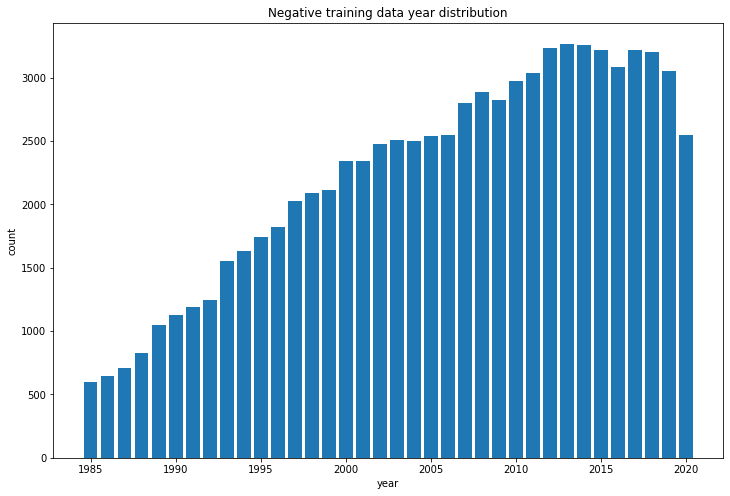

In [5]:
plt.bar(years_X, years_y)
plt.title("Negative training data year distribution")
plt.ylabel("count")
plt.xlabel("year")
plt.show()

## Extract data from negative set

### train

Find Dataframe accroding to year

In [7]:
# pos data
train_df = pd.read_csv("../csv_data/train.csv", encoding="utf-8", dtype=str)
train_df = train_df.fillna("")
train_df

,pmid,title,abstract,doi,year,authors
0,22115527,Erroneous attribution of relevant transcriptio...,Background: Cis-regulatory modules are bound b...,10.1186/1471-2164-12-578,2011,"Marc S Halfon, Qianqian Zhu, Elizabeth R Brenn..."
1,2478402,Dorsal expression of the Drosophila z600 gene ...,The Drosophila z600 gene is a member of an ove...,10.1016/0012-1606(89)90143-7,1989,"R A Schulz, J L Miksch"
2,9115734,The Drosophila islet gene governs axon pathfin...,We have isolated the Drosophila homolog of the...,10.1016/s0896-6273(00)81241-6,1997,"S Thor, J B Thomas"
3,7900988,Negative autoregulation by Ultrabithorax contr...,The Drosophila homeotic gene Ultrabithorax (Ub...,,1993,"K D Irvine, J Botas, S Jha, R S Mann, D S Hogness"
4,24186975,3D chromatin interactions organize Yan chromat...,Long-range integration of transcriptional inpu...,10.1101/gad.225789.113,2013,"Jemma L Webber, Jie Zhang, Aaron Mitchell-Dick..."
...,...,...,...,...,...,...
714,1363225,Ultrabithorax is a regulator of beta 3 tubulin...,beta 3 tubulin expression accompanies the spec...,,1992,"U Hinz, A Wolk, R Renkawitz-Pohl"
715,20668662,Robust target gene discovery through transcrip...,A comprehensive systems-level understanding of...,10.1371/journal.pbio.1000435,2010,"Stein Aerts, Xiao-Jiang Quan, Annelies Claeys,..."
716,11290304,Drosophila OVO regulates ovarian tumor transcr...,Evolutionarily conserved ovo loci encode devel...,,2001,"J Lü, B Oliver"
717,23597484,Regional modulation of a stochastically expres...,Stochastic mechanisms are sometimes utilized t...,10.1016/j.devcel.2013.02.016,2013,"Shivani U Thanawala, Jens Rister, Gregory W Go..."


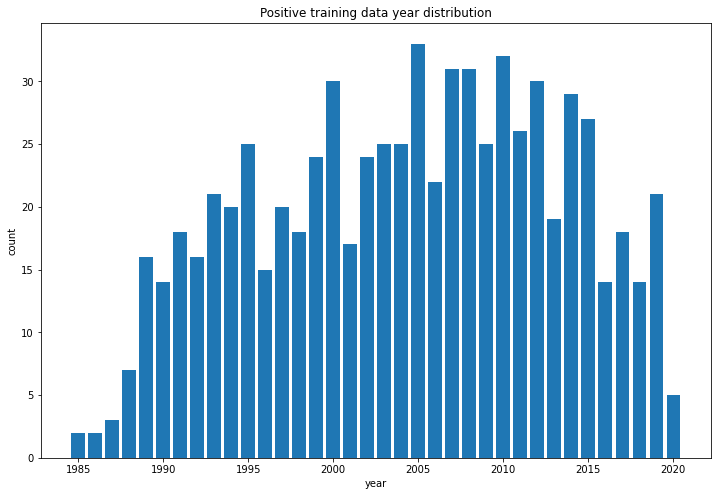

In [8]:
# pos year distribution
years_X, years_y, pos_year_set = year_distri(train_df["year"].to_list())

plt.bar(years_X, years_y)
plt.title("Positive training data year distribution")
plt.ylabel("count")
plt.xlabel("year")
plt.show()

In [9]:
all_set = dict()  # save all data by its published year, balance data to fit pos data

for i in range(1985, 2021):  # 1985 ~ 2020
    all_set[str(i)] = neg_df[neg_df["year"] == str(i)]

all_set["1985"].head()

,title,pmid,doi,abstract,year,authors
109,OVIPOSITION SITE SELECTION BY DROSOPHILA MELAN...,28561364,10.1111/j.1558-5646.1985.tb00428.x,The effects of texture and larval residues in ...,1985,"Kevin F Chess, John M Ringo"
294,Characterization of two Drosophila melanogaste...,2987802,10.1093/nar/13.2.631,Analysis of total Drosophila melanogaster DNA ...,1985,"K J Limbach, R Wu"
341,Selection for central excitation in Drosophila...,3919997,,"In two populations of Drosophila melanogaster,...",1985,"M Vargo, J Hirsch"
345,Drosophila melanogaster aldehyde dehydrogenase,3155693,10.1007/BF02005872,Subcellular fractionation by differential cent...,1985,"S Wattiaux-De Coninck, A Elens, M C Liétaert, ..."
379,Murine antibody induced-sex-ratio changes in D...,3923096,10.1093/oxfordjournals.jhered.a110076,Treatment of D. melanogaster parental blastode...,1985,P Pechan


In [10]:
def extract_data(all_set, pos_year_set, num_extract, random_seed, filename, path):

    # extract data
    extract_result = {}  # save all dataset

    for i in range(num_extract):
        extract_frames = []  # save DataFrame, e.g. [df1, df2,...]

        for year, appear_times in pos_year_set.items():
            extract_data = all_set[year].sample(
                n=appear_times, random_state=random_seed
            )
            all_set[year] = all_set[year].drop(extract_data.index)
            extract_frames.append(extract_data)

        result = pd.concat(extract_frames)  # combine dataframes in frames
        extract_result["set-" + str(i)] = result

        result.to_csv(
            path + filename + "-" + str(i) + ".csv", index=False, encoding="utf-8"
        )
        print(path + filename + "-" + str(i) + ".csv")

    return all_set, extract_result

In [11]:
all_set, extract_result = extract_data(
    all_set=all_set,
    pos_year_set=pos_year_set,
    num_extract=6,
    random_seed=0,
    filename="neg_train",
    path="../csv_data/balance/neg_train/",
)

../csv_data/balance/neg_train/neg_train-0.csv
../csv_data/balance/neg_train/neg_train-1.csv
../csv_data/balance/neg_train/neg_train-2.csv
../csv_data/balance/neg_train/neg_train-3.csv
../csv_data/balance/neg_train/neg_train-4.csv
../csv_data/balance/neg_train/neg_train-5.csv


check data

In [12]:
def check_data(extract_result, pos_year_set):
    # examine year distribution
    for dataframe in extract_result.values():
        years = dataframe["year"].to_list()
        _, _, test_year_set = year_distri(years)
        print(
            "Negtive distribution == Positive distribution :",
            pos_year_set == test_year_set,
        )
        print("=" * 50)

    # examine redundant data
    pmid_set = []  # e.g. [[pmid1, pmid2,...], [pmid99, pmid100, ...], ... ]
    test = []  # e.g. [pmid1, pmid2, ...]
    for dataset, dataframe in extract_result.items():
        pmid = dataframe["pmid"].to_list()
        pmid_set.append(pmid)
        test.extend(pmid)
    ori_ = len(test)
    test = list(set(test))
    aft_ = len(test)
    print("ori_", ori_)
    print("aft_", aft_)
    if ori_ == aft_:
        print("No redundant!")

In [13]:
check_data(extract_result, pos_year_set)

Negtive distribution == Positive distribution : True
Negtive distribution == Positive distribution : True
Negtive distribution == Positive distribution : True
Negtive distribution == Positive distribution : True
Negtive distribution == Positive distribution : True
Negtive distribution == Positive distribution : True
ori_ 4314
aft_ 4314
No redundant!


### validation

In [14]:
# pos data
train_df = pd.read_csv(
    "../csv_data/valid.csv", squeeze=True, encoding="utf-8", dtype=str
)
train_df = train_df.fillna("")
train_df

,pmid,title,abstract,doi,year,authors
0,17936744,The Friend of GATA protein U-shaped functions ...,Drosophila has emerged as an important model s...,10.1016/j.ydbio.2007.08.011,2007,"Richard Paul Sorrentino, Tsuyoshi Tokusumi, Ro..."
1,18667158,A presynaptic gain control mechanism fine-tune...,Early sensory processing can play a critical r...,10.1016/j.neuron.2008.07.003,2008,"Cory M Root, Kaoru Masuyama, David S Green, Li..."
2,18986212,Evolution acts on enhancer organization to fin...,The elucidation of principles governing evolut...,10.1371/journal.pbio.0060263,2008,"Justin Crocker, Yoichiro Tamori, Albert Erives"
3,30842209,Redundant and Cryptic Enhancer Activities of t...,Cis-regulatory sequences known as enhancers pl...,10.1534/genetics.119.301985,2019,"Gizem Kalay, Jennifer Lachowiec, Ulises Rosas,..."
4,25760344,Cis-regulatory mechanisms for robust olfactory...,Odor perception requires that each olfactory s...,10.1371/journal.pgen.1005051,2015,"Shadi Jafari, Mattias Alenius"
...,...,...,...,...,...,...
85,20512118,Phenotypic robustness conferred by apparently ...,Genes include cis-regulatory regions that cont...,10.1038/nature09158,2010,"Nicolás Frankel, Gregory K Davis, Diego Vargas..."
86,7590239,Suppressor of hairless directly activates tran...,We have investigated the functional relationsh...,10.1101/gad.9.21.2609,1995,"A M Bailey, J W Posakony"
87,8887679,Regulation of the EDG84A gene by FTZ-F1 during...,The transcription factor FTZ-F1 is a member of...,10.1128/mcb.16.11.6509,1996,"T Murata, Y Kageyama, S Hirose, H Ueda"
88,19837039,Writing memories with light-addressable reinfo...,Dopaminergic neurons are thought to drive lear...,10.1016/j.cell.2009.08.034,2009,"Adam Claridge-Chang, Robert D Roorda, Elefther..."


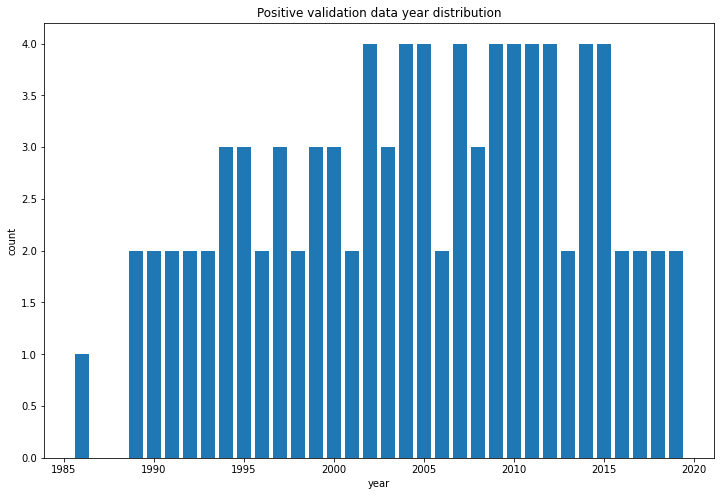

In [15]:
# pos year distribution
years_X, years_y, pos_year_set = year_distri(train_df["year"].to_list())

plt.bar(years_X, years_y)
plt.title("Positive validation data year distribution")
plt.ylabel("count")
plt.xlabel("year")
plt.show()

In [16]:
all_set, extract_result = extract_data(
    all_set=all_set,
    pos_year_set=pos_year_set,
    num_extract=1,
    random_seed=0,
    filename="neg_valid",
    path="../csv_data/balance/neg_valid/",
)

../csv_data/balance/neg_valid/neg_valid-0.csv


## test

In [17]:
# pos data
train_df = pd.read_csv(
    "../csv_data/test.csv", squeeze=True, encoding="utf-8", dtype=str
)
train_df = train_df.fillna("")
train_df

,pmid,title,abstract,doi,year,authors
0,8007953,The ecdysone response enhancer of the Fbp1 gen...,The transcription of the Drosophila melanogast...,10.1128/mcb.14.7.4465,1994,"C Antoniewski, M Laval, A Dahan, J A Lepesant"
1,11080162,Direct transcriptional control of the Dpp targ...,The gradient morphogen Decapentaplegic (Dpp) o...,10.1093/emboj/19.22.6162,2000,"R Sivasankaran, M A Vigano, B Müller, M Affolt..."
2,26710299,Identification and Validation of Novel Hedgeho...,The Hedgehog (Hh) signaling pathway directs a ...,10.1371/journal.pone.0145225,2015,"Katherine Gurdziel, David S Lorberbaum, Aaron ..."
3,22307950,Drosophila DREF acting via the JNK pathway is ...,The Drosophila Jun N-terminal kinase (JNK) gen...,10.1002/dvg.22017,2012,"Yasuhide Yoshioka, Trong Tue Nguyen, Shunsuke ..."
4,10409761,Dual requirement for the EcR/USP nuclear recep...,The EcR/USP nuclear receptor controls Drosophi...,10.1128/mcb.19.8.5732,1999,"V Brodu, B Mugat, J Y Roignant, J A Lepesant, ..."
...,...,...,...,...,...,...
85,9043065,Ftz-F1 is a cofactor in Ftz activation of the ...,The fushi tarazu pair-rule gene is required fo...,,1997,"B Florence, A Guichet, A Ephrussi, A Laughon"
86,28760811,Patterning of the Drosophila L2 vein is driven...,Pattern formation relies on the generation of ...,10.1242/dev.143461,2017,"Mercedes Martín, Cristina M Ostalé, Jose F de ..."
87,2423251,A tissue-specific transcription enhancer from ...,The yolk protein 1 gene (yp1) of Drosophila me...,10.1016/0092-8674(86)90560-x,1986,"M J Garabedian, B M Shepherd, P C Wensink"
88,22005665,Second order regulator Collier directly contro...,"In Drosophila, trunk metamerization is establi...",10.1016/j.ydbio.2011.09.035,2011,"Evgenia Ntini, Ernst A Wimmer"


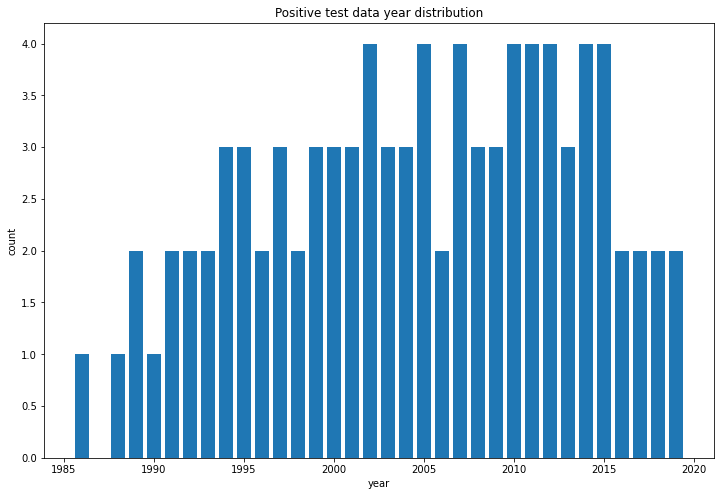

In [18]:
# pos year distribution
years_X, years_y, pos_year_set = year_distri(train_df["year"].to_list())

plt.bar(years_X, years_y)
plt.title("Positive test data year distribution")
plt.ylabel("count")
plt.xlabel("year")
plt.show()

In [19]:
all_set, extract_result = extract_data(
    all_set=all_set,
    pos_year_set=pos_year_set,
    num_extract=1,
    random_seed=0,
    filename="neg_test",
    path="../csv_data/balance/neg_test/",
)

../csv_data/balance/neg_test/neg_test-0.csv


## Check redundancy

In [20]:
def csv2pmid(path):
    df = pd.read_csv(path, encoding="utf-8", dtype=str)
    df = df["pmid"].to_list()
    return df

In [21]:
# train
t0 = csv2pmid("../csv_data/balance/neg_train/neg_train-0.csv")
t1 = csv2pmid("../csv_data/balance/neg_train/neg_train-1.csv")
t2 = csv2pmid("../csv_data/balance/neg_train/neg_train-2.csv")
t3 = csv2pmid("../csv_data/balance/neg_train/neg_train-3.csv")
t4 = csv2pmid("../csv_data/balance/neg_train/neg_train-4.csv")
t5 = csv2pmid("../csv_data/balance/neg_train/neg_train-5.csv")

# valid
cv0 = csv2pmid("../csv_data/balance/neg_valid/neg_valid-0.csv")

# test
test0 = csv2pmid("../csv_data/balance/neg_test/neg_test-0.csv")

In [22]:
all_ = t0 + t1 + t2 + t3 + t4 + t5 + cv0 + test0
print("Before:", len(all_))

all_ = list(set(all_))
print("After:", len(all_))

Before: 4494
After: 4494
